#  Instructions (please read carefully): 

All answers should be included in this file, either in a Code or Markdown cell. Extras have been created to indicate where to respond, but you can add additional ones if you see fit. 

Use provided code as you wish, write your own if you prefer. Do NOT delete any of the existing code/text, just comment it if you need to. 

The exam timer will expire and automatically submit your exam exactly 1:15 minutes after you start. The exam is supposed to be 1 hour, so please use the last 15 minutes to double-check everything, save and submit. DO NOT WAIT UNTIL last 5 minutes to submit as we have seen this causes issues in the past.

All conceptual questions must be answered in a Markdown cell. There is no need to worry about nicely edited equations if you don't feel comfortable with that, just type into a markdown cell directly.

Allowed to use: All class notes, slides, Jupyter Notebooks, Homework solutions.

Not allowed: <br>
i.   General web, google, chatgpt, or other blogs etc., <br>
ii.  Communicate with others during exam. <br>
iii. Share exam with others at ANY time. <br>

You are only allowed to communicate with F. Boukouvala during exam in case of major issues (i.e., power outage, something crashing/not working, etc. Use text at: 2012216380). Please state your name and issue in the text.

Because everyone is taking exam at a different time, no clarification questions will be answered on Piazza. Any posts will be deleted.

Good Luck!

# Honor Code Statement (please provide electronic signature):

I agree to follow Georgia Tech's honor code and follow the instructions provided above. 


**Name:**

**Date:**

**Start time (EST):**

## Problem 1: Short Questions (35 points)

#### A. (15 points): Convexity
A lot of Machine Learning models have the following terms: 
$ f(x_{1}) = \sum_{i}{w_{i}\sqrt{(x_{1}-a_{i})^{2}}} $

Assume that $w_{i}$ and $a_{i}$ are fixed parameters, and that  $w_{i} \ge 0$. Is this function convex, concave or nonconvex?

Don't type your entire solution, but verbally explain how you got to your mathematical answer (e.g., I calculated/derived ..., then formed, ... or I used property that states ..., etc.). After your text description of your approach, provide numerical values (if applicable, e.g., eigenvalues) that led you to your answer (again: do not need to show all steps for calculation using equations in markdown!). 

DO NOT answer this question by plotting. 


### Answer Here:

### $\color{blue}{\text{Answer}}$
Since we know that w_i are positive, and (x_i-a_i)^2 is also always positive, we know that if we multiply a function by a nonnegative constant, it does not change its convexity properties. So first, we will study convexity of term

$ \sqrt{(x-a)^{2}} $

This expression is equivalent to 

$ |x-a| $

This is a convex function, that is however not differentiable at x=a. 

A sum of convex functions, multiplied by a nonegative number should be a convex function.

However, this is not a differentiable function, so some local nonlinear optimization problems cannot solve it. 


#### B. (10 points): Lagrange 

For the following problem, write the KKT conditions below. Does (1,1) satisfy those conditions and based on this result, is it the global minimum of this problem?

min $ 3x_{1}x_{2} - x_{1} - x_{2} $ 

s.t. 

$ 1-x_{1} \le 0 $

$ 1-x_{2} \le 0 $


### Answer Here: (type, no need to write nice equations if you're not comfortable with Markdown equations)

### $\color{blue}{\text{Answer}}$

In this problem: 
(a) constraints are linear ==> convex
(b) objective function: is nonconvex in entire x1,x2 space, but convex in x1>=1, x2>=1. So overall this problem is convex, if we find a KKT point, it is the global opt.

KKT conditions:

1. Lagrange function : 3x_1x_2 - x_1 - x_2 + mu1 (1-x_1) + mu2 (1-x_2)

Stationarity:

$ 3x_{2}-1-\mu_{1} = 0 $

$ 3x_{1}-1-\mu_{2} = 0 $


2. Constraints:

$ 1 - x_{1} <= 0 $

$ 1 - x_{2} <= 0 $

3. Complementarity:

$ \mu_{1}(1-x_{1}) = 0 $

$ \mu_{2}(1-x_{2}) = 0 $

4. Lagrange multiplier positivity:

$ \mu_{1}, \mu_{2} >= 0 $


Point (1,1):

$ \mu_{1} = 3-1=2 $

$ \mu_{2} = 3-1=2 $

$ 1 - 1 = 0 $

$ 1 - 1 = 0 $

$ \mu_{1} , \mu_{2} > 0 $

Complimentarity constraints hold since constraints are equal to zero. 

So for the above values of $ \mu $, KKT conditions are satisfied, problem is convex in feasible region, so this is global optimum.


#### C. (10 points): Short Answer
An optimization problem must be solved, for which the objective function value (f(x)) can be provided as a function of the 10 decision variables (x) via a simulation that takes 10 minutes to run (for a single sample). The simulation output is not deterministic (gives slightly different output for the same input). A data-driven optimization solver is needed here because you do not have access to the equations that relate f(x) to x. 

Describe briefly what data-driven solver approach/category would you use and why (not specific solver, but direct-search, vs. model-based, vs. evolutionary, etc).

### Answer Here:

### $\color{blue}{\text{Answer}}$
This is a moderarely large problem (10 variables) and sampling is expensive. So a stochastic/ genetic algorithm type method is not ideal, because they require a lot of samples. 
Since the simulation is not deterministic, a surrogate-based approach may be quite suitable because using regression models "smooths" out the noise. A direct search method may be negatively affected by the noise. 

So, an adaptive model-based data-driven method, with a small initial set of samples and a procedure that adaptively refines the solution towards an optimum may be best option. 

Other answers also considered correct if sufficient justification provided.


## Problem 2: Linear Optimization Solution (15 points)
The following linear optimization problem shown below has been almost formulated in Pyomo already. Fix some minor gaps and attempt to find the optimal solution. Explain the outcome graphically below. (What are the vertices of the feasible space?) 

max  $ x_{1} + x_{2} $

subject to:

$ x_{1} - x_{2} \ge 1$

$ x_{1} + x_{2} \ge 2$

$ x_{1},x_{2} \ge 0$



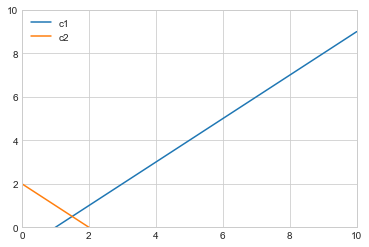

In [1]:
from pyomo.environ import *
import numpy as np

p = ConcreteModel() 

p.x1 = Var(within=NonNegativeReals)
p.x2 = Var(within=NonNegativeReals)

p.con1 = Constraint(expr= p.x1 - p.x2  >= 1)
p.con2 = Constraint(expr= p.x1 + p.x2  >= 2)
p.obj = Objective(expr = p.x1+p.x2, sense = maximize)

solver = SolverFactory('glpk')
#solver.solve(p,tee=True)
#print('*** Solution *** :') 
#print('x1', value(p.x1))
#print('x2', value(p.x2))
#print('objective',value(p.obj))


##Plotting in 0 - 10:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

fig = plt.figure()
a = plt.axes()
x = np.linspace(0,10,10)
plt.xlim(0,10)
plt.ylim(0,10)
plt.plot(x, x-1, label = 'c1')
plt.plot(x, 2-x, label = 'c2')
plt.legend();

### Answer Problem 2 here:


### $\color{blue}{\text{Answer}}$
Solver cannot find a solution because the problem is unbounded. We should see this graphically since feasible region is not bounded (we cannot find vertices to form a closed region like in most problems we have solved so far). This is a typical problem in LP, if problem is not defined well. The objective function can increase/decrease to +/- infinity (not realistic optimum for most real optimization problems!)


## Problem 3: Underestimators and Branch-and-Bound (20 points)
### A)
$f(x)=sin(x)$, where $-5 \le x \le 5$ is a nonconvex function, and some global optimization algorithms would use underestimators of this function to optimize a problem containing this function. 

Think of a good underestimator for this function, and plot it below. You can do this graphically, not mathematically, and it could be any function.

You can change the limits of the plot and add lines to show the underestimator.
Briefly discuss below the plot why you think this is a valid, good/bad underestimator.

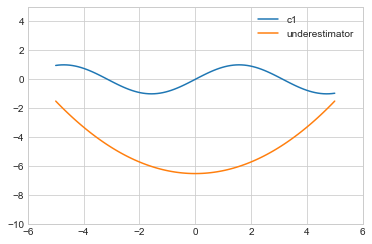

In [2]:
##Plotting in 0 - 10:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

fig = plt.figure()
a = plt.axes()
x = np.linspace(-5,5,100)
plt.xlim(-6,6)
plt.ylim(-10,5)
plt.plot(x, np.sin(x), label = 'c1')

## All we need here is something that is convex and is below the function everywhere. The underestimator shown here is valid, 
## although not the best as it is not really close to real function, but it is valid.
plt.plot(x, 0.2*x**2-6.5, label = "underestimator")
plt.legend();

### 3B) Branch-and-Bound

The following Integer Optimization Problem has been formulated in Pyomo already below. Use this formulation, making small edits every time you solve it to replicate a scenario of a branch-and-bound algorithm. Explain qualitatively (IN-TEXT) below how a branch-and-bound algorithm would proceed in solving the problem, and what the upper or lower bound in each node would be, and when the algorithm would stop. What is the global solution? You do not need to save multiple versions of the Pyomo code, just explain the sequence of nodes you ran in text.
For example, write:

Zeroth' node: 
Relaxed variables: x1,x2,...
Fixed variables: -
Type of problem: LP
Solution: x=(0, 0.5, ) obj = 10 
UB or LB? UPPER BOUND

Node 1:
Relaxed variables: x1,x2,...
Fixed variables: -
Type of problem: LP
Solution: x=(0, 0.5, ) obj = 10 
UB or LB? UPPER BOUND



In [3]:
from pyomo.environ import *
import numpy as np

p = ConcreteModel() 

p.x1 = Var(within=Binary)
p.x2 = Var(within=Binary)
p.x3 = Var(within=Binary)

p.con1 = Constraint(expr= 9*p.x1 + 6*p.x2 + 10*p.x3 <= 10)
p.con2 = Constraint(expr= 20*p.x1 + 63*p.x2 + 10*p.x3 <= 80)
p.obj = Objective(expr = 5*p.x1 + 8*p.x2 + 6*p.x3 , sense = maximize)

solver = SolverFactory('glpk')
solver.solve(p)
print('*** IP global Solution *** :') 
print('x1', value(p.x1))
print('x2', value(p.x2))
print('x3', value(p.x3))
print('objective',value(p.obj))

*** IP global Solution *** :
x1 0.0
x2 1.0
x3 0.0
objective 8.0


In [4]:
from pyomo.environ import *
import numpy as np


print('zeroth node / Root node : relax all variables, This is unbounded')
print('\nNode 1 : fix variable x1 = 0, relax x2 and x3')

p = ConcreteModel() 
p.x1 = Var(within=Reals)
p.x1.fixed = True
p.x1.value = 0
p.x2 = Var(within=Reals)
p.x3 = Var(within=Reals)
p.con1 = Constraint(expr= 9*p.x1 + 6*p.x2 + 10*p.x3 <= 10)
p.con2 = Constraint(expr= 20*p.x1 + 63*p.x2 + 10*p.x3 <= 80)
p.obj = Objective(expr = 5*p.x1 + 8*p.x2 + 6*p.x3 , sense = maximize)
solver = SolverFactory('glpk')
solver.solve(p)
print('*** Solution *** :') 
print('x1', value(p.x1))
print('x2', value(p.x2))
print('x3', value(p.x3))
print('objective',value(p.obj))

print('\nNode 2 : fix variable x1 = 1, relax x2 and x3')
p = ConcreteModel() 
p.x1 = Var(within=Reals)
p.x1.fixed = True
p.x1.value = 1
p.x2 = Var(within=Reals)
p.x3 = Var(within=Reals)
p.con1 = Constraint(expr= 9*p.x1 + 6*p.x2 + 10*p.x3 <= 10)
p.con2 = Constraint(expr= 20*p.x1 + 63*p.x2 + 10*p.x3 <= 80)
p.obj = Objective(expr = 5*p.x1 + 8*p.x2 + 6*p.x3 , sense = maximize)
solver = SolverFactory('glpk')
solver.solve(p)
print('*** Solution *** :') 
print('x1', value(p.x1))
print('x2', value(p.x2))
print('x3', value(p.x3))
print('objective',value(p.obj))

print('\nNode 3 : fix variable x1 = 0, fix x2 = 0 and relax x3')
p = ConcreteModel() 
p.x1 = Var(within=Reals)
p.x1.fixed = True
p.x1.value = 0
p.x2 = Var(within=Reals)
p.x2.fixed = True
p.x2.value = 0
p.x3 = Var(within=Reals)
p.con1 = Constraint(expr= 9*p.x1 + 6*p.x2 + 10*p.x3 <= 10)
p.con2 = Constraint(expr= 20*p.x1 + 63*p.x2 + 10*p.x3 <= 80)
p.obj = Objective(expr = 5*p.x1 + 8*p.x2 + 6*p.x3 , sense = maximize)
solver = SolverFactory('glpk')
solver.solve(p)
print('*** Solution *** :') 
print('x1', value(p.x1))
print('x2', value(p.x2))
print('x3', value(p.x3))
print('objective',value(p.obj))

print('\nNode 4 : fix variable x1 = 0, fix x2 = 1 and relax x3')
p = ConcreteModel() 
p.x1 = Var(within=Reals)
p.x1.fixed = True
p.x1.value = 0
p.x2 = Var(within=Reals)
p.x2.fixed = True
p.x2.value = 1
p.x3 = Var(within=Reals)
p.con1 = Constraint(expr= 9*p.x1 + 6*p.x2 + 10*p.x3 <= 10)
p.con2 = Constraint(expr= 20*p.x1 + 63*p.x2 + 10*p.x3 <= 80)
p.obj = Objective(expr = 5*p.x1 + 8*p.x2 + 6*p.x3 , sense = maximize)
solver = SolverFactory('glpk')
solver.solve(p)
print('*** Solution *** :') 
print('x1', value(p.x1))
print('x2', value(p.x2))
print('x3', value(p.x3))
print('objective',value(p.obj))


print('\nNode 5 : fix variable x1 = 1, fix x2 = 0 and relax x3')
p = ConcreteModel() 
p.x1 = Var(within=Reals)
p.x1.fixed = True
p.x1.value = 1
p.x2 = Var(within=Reals)
p.x2.fixed = True
p.x2.value = 0
p.x3 = Var(within=Reals)
p.con1 = Constraint(expr= 9*p.x1 + 6*p.x2 + 10*p.x3 <= 10)
p.con2 = Constraint(expr= 20*p.x1 + 63*p.x2 + 10*p.x3 <= 80)
p.obj = Objective(expr = 5*p.x1 + 8*p.x2 + 6*p.x3 , sense = maximize)
solver = SolverFactory('glpk')
solver.solve(p)
print('*** Solution *** :') 
print('x1', value(p.x1))
print('x2', value(p.x2))
print('x3', value(p.x3))
print('objective',value(p.obj))


print('\nNode 6 : fix variable x1 = 1, fix x2 = 1 and relax x3')
p = ConcreteModel() 
p.x1 = Var(within=Reals)
p.x1.fixed = True
p.x1.value = 1
p.x2 = Var(within=Reals)
p.x2.fixed = True
p.x2.value = 1
p.x3 = Var(within=Reals)
p.con1 = Constraint(expr= 9*p.x1 + 6*p.x2 + 10*p.x3 <= 10)
p.con2 = Constraint(expr= 20*p.x1 + 63*p.x2 + 10*p.x3 <= 80)
p.obj = Objective(expr = 5*p.x1 + 8*p.x2 + 6*p.x3 , sense = maximize)
solver = SolverFactory('glpk')
solver.solve(p)
print('*** Solution *** :') 
print('x1', value(p.x1))
print('x2', value(p.x2))
print('x3', value(p.x3))
print('objective',value(p.obj))

zeroth node / Root node : relax all variables, This is unbounded

Node 1 : fix variable x1 = 0, relax x2 and x3
*** Solution *** :
x1 0
x2 1.2280701754386
x3 0.263157894736842
objective 11.403508771929852

Node 2 : fix variable x1 = 1, relax x2 and x3
*** Solution *** :
x1 1
x2 1.03508771929825
x3 -0.521052631578947
objective 10.154385964912318

Node 3 : fix variable x1 = 0, fix x2 = 0 and relax x3
*** Solution *** :
x1 0
x2 0
x3 1.0
objective 6.0

Node 4 : fix variable x1 = 0, fix x2 = 1 and relax x3
*** Solution *** :
x1 0
x2 1
x3 0.4
objective 10.4

Node 5 : fix variable x1 = 1, fix x2 = 0 and relax x3
*** Solution *** :
x1 1
x2 0
x3 0.1
objective 5.6

Node 6 : fix variable x1 = 1, fix x2 = 1 and relax x3
*** Solution *** :
x1 1
x2 1
x3 -0.5
objective 10.0


### Answer 3B here:

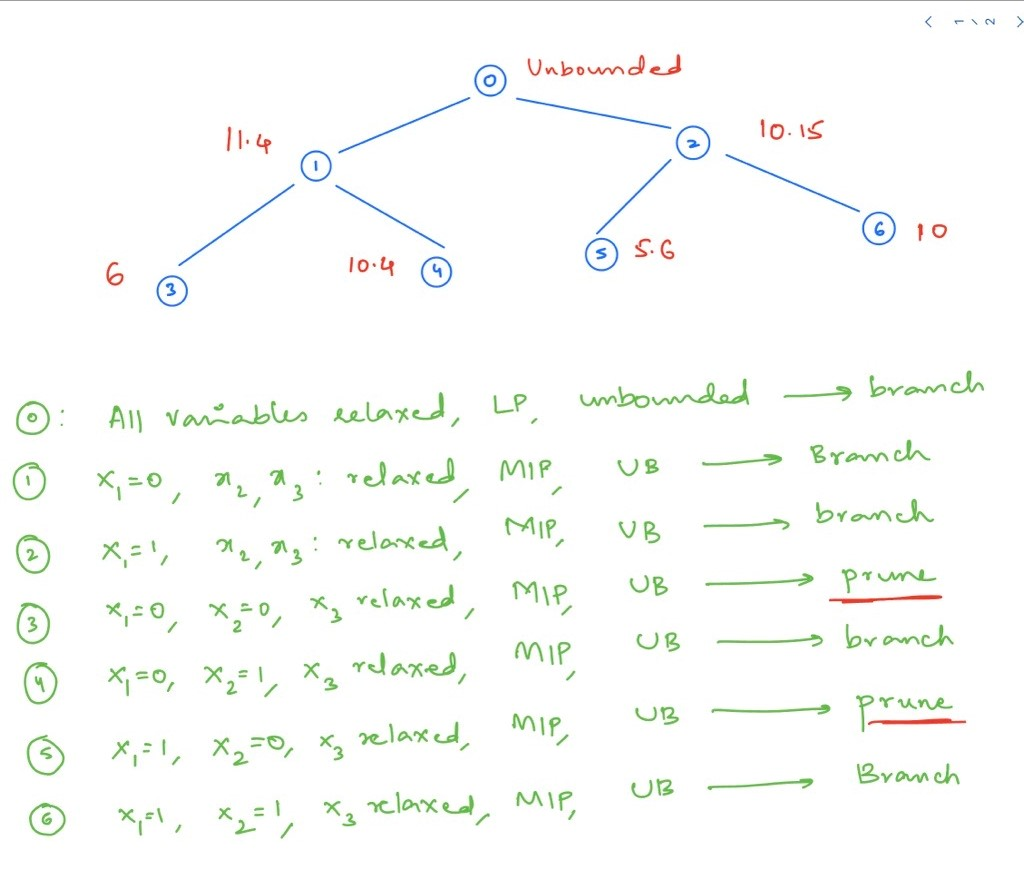

Node 0: \
Relaxed variables:   All          \
Fixed variables:       None         \
Type of problem:          LP       \
LP Solution: x=   obj =    unbounded      \
UB or LB?              UB          \
prune?                   No, branch further         \

Node 1: \
Relaxed variables:      x2, x3       \
Fixed variables:         x1       \
Type of problem:           MILP      \
LP Solution: x=   obj =    11.40      \
UB or LB?               UB         \
prune?                    No, branch further    \

Node 2: \
Relaxed variables:      x2, x3       \
Fixed variables:         x1       \
Type of problem:           MILP      \
LP Solution: x=   obj =      10.15    \
UB or LB?                 UB       \
prune?                No, branch further (we can prune this, if x1,x2,x3 >= 0)           \


....


Optimal Solution: \
x =   [0,1,0]       \
obj =     8         \


## Problem 4: Mixed Integer Formulation & Pyomo solution (30 pts)
You have been tasked to solve a panel-reviewer assignment problem. 

- There are 4 reviewers and 8 proposals to be reviewed. 
- Each proposal needs to be reviewed by 2 reviewers. 
- Each reviewer should not be assigned more than 4 proposals.
- The Reviewers have been asked to provide a ranking of their preferences, based on their expertise on a scale of 4-0. A ranking of 4 means that the Reviewer is an expert to review that specific proposal, a ranking of 1 means that they are not that knowledgeable on the topic the proposal covers, and a ranking of 0 means they have a conflict of interest and should NOT review that proposal.
- If a Reviewer has indicated a conflict of interest, they should NOT be assigned to proposal.
- As an objective, you can maximize the average "expertise" for each proposal, which should be the average ranking of the assigned reviewers for each proposal.

Write a Mixed-Integer Linear Optimization problem to make the most optimal assignments between reviewers and proposals, ensuring that the above constraints are satisfied. 

|  | Reviewer 1 | Reviewer 2 | Reviewer 3 | Reviewer 4 |
| --- | --- | --- | --- | --- | 
|Proposal1 | 0 | 4 | 2 | 1 |  
|Proposal2 | 3 | 0 | 4 | 0 | 
|Proposal3 | 4 | 3 | 1 | 4 |  
|Proposal4 | 1 | 3 | 3 | 2 | 
|Proposal5 | 2 | 2 | 4 | 3 |  
|Proposal6 | 0 | 2 | 3 | 1 | 
|Proposal7 | 2 | 1 | 3 | 4 |  
|Proposal8 | 3 | 0 | 4 | 1 | 

*If you know the formulation, but have trouble formulating it in Pyomo in time, please include the formulation in markdown, even if you don't solve it, to get as much partial credit as possible!*

In [5]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from pyomo.environ import *
from pylab import *
from pyomo.opt import SolverStatus, TerminationCondition

m = ConcreteModel()

#Creating data based on table shown below
ProposalAssignments = {(1,1):0, (1,2):4, (1,3):2, (1,4):1, 
                      (2,1):3, (2,2):0, (2,3):4, (2,4):0,
                      (3,1):4, (3,2):3, (3,3):1, (3,4):4,
                      (4,1):1, (4,2):3, (4,3):3, (4,4):2,
                      (5,1):2, (5,2):2, (5,3):4, (5,4):3,
                      (6,1):0, (6,2):2, (6,3):3, (6,4):1,
                      (7,1):2, (7,2):1, (7,3):3, (7,4):4,
                      (8,1):3, (8,2):0, (8,3):4, (8,4):1
                     }

#Define sets (you can uncomment and use sets below, or not if you do not wish to use them):
m.reviewers = Set(initialize=[1,2,3,4])
m.proposals  = Set(initialize=[1,2,3,4,5,6,7,8])

#Define Variables:
m.y = Var(m.proposals, m.reviewers, within=Binary)
m.average_total = Var(m.proposals, within=Reals)

# define constraints
def con1(m, i):
    return m.average_total[i] == sum(m.y[i,j]*ProposalAssignments[i,j] for j in m.reviewers)/4 
m.con1 = Constraint(m.proposals, rule=con1)

def con2(m, i):
    return sum(m.y[i,j] for j in m.reviewers) == 2
m.con2 = Constraint(m.proposals, rule=con2)

def con3(m, j):
    return sum(m.y[i,j] for i in m.proposals) <= 4
m.con3 = Constraint(m.reviewers, rule=con3)

def con4(m, i, j):
    return m.y[i,j] <= ProposalAssignments[i,j]
m.con4 = Constraint(m.proposals,m.reviewers, rule=con4)

# define the objective function
def obj_rule(m):
    return sum(m.average_total[i] for i in m.proposals)
m.obj = Objective(rule=obj_rule, sense=maximize)

# solve the model
solver = SolverFactory("glpk")
#results = solver.solve(m, tee = "True")
results = solver.solve(m)

# print results
print(f"Termination condition: {results.solver.termination_condition}")
print(f"optimal objective: {value(m.obj):.4f}")
for i in [1,2,3,4,5,6,7,8]:
    print(value(m.y[i,1]),value(m.y[i,2]),value(m.y[i,3]),value(m.y[i,4]))
    print(value(m.average_total[i]))

Termination condition: optimal
optimal objective: 12.2500
0.0 1.0 1.0 0.0
1.5
1.0 0.0 1.0 0.0
1.75
1.0 0.0 0.0 1.0
2.0
0.0 1.0 0.0 1.0
1.25
0.0 1.0 0.0 1.0
1.25
0.0 1.0 1.0 0.0
1.25
1.0 0.0 0.0 1.0
1.5
1.0 0.0 1.0 0.0
1.75


### The End